In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

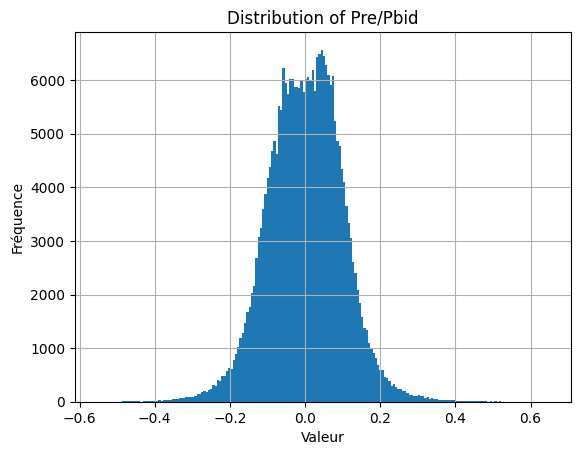

count    267840.000000
mean          0.001477
std           0.099378
min          -0.552500
25%          -0.065500
50%           0.003500
75%           0.067500
max           0.647500
Name: Pre/Pbid, dtype: float64

In [3]:
# Import data
df = pd.read_csv("data/france_2019_05.csv")
df.head()

# Construction of values Pre/Pbid
df["Frequency"] = df["Frequency"]*10**(-3)
df["Pre/Pbid"] = 5*(df["Frequency"])
df.head()

# Plot of the distribution Pre/Pbid
df["Pre/Pbid"].hist(bins=200)
plt.xlabel("Valeur")
plt.ylabel("Fréquence")
plt.title("Distribution of Pre/Pbid")
plt.show()

df["Pre/Pbid"].describe()


Q2 :The regulating power tries to balance the frequency between -0.2 Hz and 0.2Hz

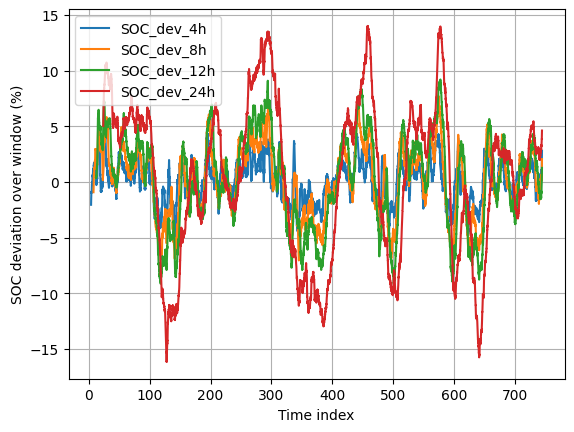

In [ ]:
#Q3

E_batt = 46 # 𝐸𝑏𝑎𝑡𝑡 the useful energy capacity of the battery in kWh
P_max = 7 # Power of bindirectional transfert of the battery in kW
P_bid = P_max/1.1 #
eta = 1

df["Pre"] = df["Pre/Pbid"] * P_bid
df["dSOC/dt"] = np.where(df["Pre"] >= 0, 100*(eta * df["Pre"]) / E_batt, 100*(df["Pre"] / (eta * E_batt)))


# temporal step in hours
dt_h = 10 / 3600   

# dSOC par pas (en %)
df["dSOC"] = df["dSOC/dt"] * dt_h

# rolling SOC deviation (dérive nette) sur fenêtres glissantes
df["SOC_dev_4h"]  = df["dSOC"].rolling(1440).sum()
df["SOC_dev_8h"]  = df["dSOC"].rolling(2880).sum()
df["SOC_dev_12h"] = df["dSOC"].rolling(4320).sum()
df["SOC_dev_24h"] = df["dSOC"].rolling(8640).sum()

# Modify of index of the dataframe to have the period
df.index = df.index * 10 / 3600
df.index.name = "Time (h)"

df[["SOC_dev_4h", "SOC_dev_8h", "SOC_dev_12h", "SOC_dev_24h"]].plot()
plt.ylabel("SOC deviation over window (%)")
plt.xlabel("Time index")
plt.grid(True)
plt.show()



# Q4 : ta réponse mathieu

In [ ]:
# Q5 Uniform strategy

N = 100 #Number of batteries
# assume there are 100 batteries of the same capacity connected
# Pre of individual vehicle battery is P_re/N

df["P_re_uniform"] = df["Pre"]/N
